# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# For interactive graphics you will need to install ipympl

In [2]:
# Import library for LR
import statsmodels.api as sm
%precision %.3f

'%.3f'

## Simple linear regression

In [3]:
Advertising = pd.read_csv("Advertising.csv")
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
Advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
model = sm.OLS(Advertising.sales, sm.add_constant(Advertising.TV))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.47e-42
Time:                        17:37:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

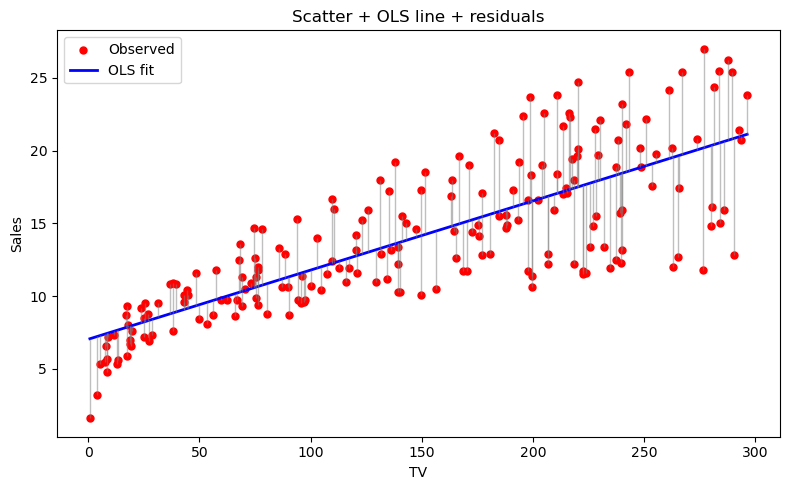

<Figure size 640x480 with 0 Axes>

In [6]:
# 1) Fit the model
X = sm.add_constant(Advertising.TV)
model = sm.OLS(Advertising.sales, X)
results = model.fit()

# 2) Sort for smooth line
sorted_idx    = np.argsort(Advertising.TV)
tv_sorted     = Advertising.TV.iloc[sorted_idx]
y_pred_sorted = results.predict(sm.add_constant(tv_sorted))

# 3) Create a fresh 2D figure & axes
fig, ax = plt.subplots(figsize=(8,5))

# 4) Scatter
ax.scatter(Advertising.TV, Advertising.sales, facecolors='red', edgecolors='red', s=25, label='Observed')

# 5) OLS fit line
ax.plot(tv_sorted, y_pred_sorted, color='blue', linewidth=2, label='OLS fit')

# 6) Vertical residual sticks
ax.vlines(x = Advertising.TV, ymin = Advertising.sales, ymax = results.predict(X), colors = 'gray', alpha  = 0.5, linewidth = 1)

# 7) Final styling
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('Scatter + OLS line + residuals')
ax.legend()
plt.tight_layout()
plt.show()
plt.savefig("sales_vs_tv.png")

In [7]:
from scipy import stats
beta_hat = results.params
se = results.bse

df = int(results.df_resid)
t_stats = beta_hat / se

#    p = 2 * P(T_{df} > |t|)
p_values = 2 * stats.t.sf(np.abs(t_stats), df)
print(f"t-statistics: \n{t_stats}")
print(f"p-values: \n {p_values}")

t-statistics: 
const    15.360275
TV       17.667626
dtype: float64
p-values: 
 [1.40630048e-35 1.46738970e-42]


In [8]:
print(f"Residual standard error: {results.scale**.5:.3f}")
print(f"R^2: {results.rsquared:.3f}")
print(f"F-statistic: {results.fvalue:.3f}")

Residual standard error: 3.259
R^2: 0.612
F-statistic: 312.145


In [9]:
model = sm.OLS(Advertising.sales, sm.add_constant(Advertising.radio))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           4.35e-19
Time:                        13:05:46   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

In [10]:
model = sm.OLS(Advertising.sales, sm.add_constant(Advertising.newspaper))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 16 Jun 2025   Prob (F-statistic):            0.00115
Time:                        13:05:49   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

## Multiple Linear Regression

In [11]:
# 1) Select your predictors
X = Advertising[['TV', 'radio', 'newspaper']]

# 2) Add an intercept (constant) column
X = sm.add_constant(X)

# 3) Define and fit the model
model = sm.OLS(Advertising.sales, X)
results = model.fit()

# 4) Inspect the output
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.58e-96
Time:                        13:05:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [12]:
from mpl_toolkits.mplot3d import Axes3D
# For displaying your plots on a separate interactive window
%matplotlib qt

# Load data
Advertising = pd.read_csv('Advertising.csv')

# Fit OLS: sales ~ TV + Radio
X = sm.add_constant(Advertising[['TV','radio']])
y = Advertising.sales
model = sm.OLS(y, X).fit()

# Make grid for plane
tv_vals    = np.linspace(Advertising.TV.min(), Advertising.TV.max(), 20)
radio_vals = np.linspace(Advertising.radio.min(), Advertising.radio.max(), 20)
grid_tv, grid_radio = np.meshgrid(tv_vals, radio_vals)
grid_X = np.column_stack([np.ones(grid_tv.size), grid_tv.ravel(), grid_radio.ravel()])
grid_pred = model.predict(grid_X).reshape(grid_tv.shape)

# Plot
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection='3d')

# a) scatter
ax.scatter(Advertising.TV, Advertising.radio, Advertising.sales,
           color='red', alpha=0.6, label='Observed')

# b) plane
ax.plot_surface(grid_tv, grid_radio, grid_pred,
                cmap='viridis', alpha=0.5, edgecolor='none')

# c) residual sticks — use ax.plot for each
y_pred = model.predict(X)
for x_i, r_i, yhat_i, y_i in zip(Advertising.TV, Advertising.radio,
                                 y_pred, Advertising.sales):
    ax.plot([x_i, x_i], [r_i, r_i],  [yhat_i, y_i], color='gray', alpha=0.5,linewidth=1)

# d) view & labels
ax.set_xlabel('TV Budget')
ax.set_ylabel('Radio Budget')
ax.set_zlabel('Sales')
ax.set_title('3D OLS Fit: Sales ~ TV + Radio')

# optional: set a nice initial view

plt.tight_layout()
plt.show()

In [18]:
# To keep plots on the actual notebook
%matplotlib qt

In [14]:
print(f"Residual standard error: {results.scale**.5:.3f}")
print(f"R^2: {results.rsquared:.3f}")
print(f"F-statistic: {results.fvalue:.3f}")

Residual standard error: 1.686
R^2: 0.897
F-statistic: 570.271


In [19]:
cor = Advertising[['TV','radio','newspaper','sales']].corr()
print('Correlations\n',cor)
sns.heatmap(cor, annot=True)
plt.show()

Correlations
                  TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000
